#### In this part we will be creating a multi layer perceptron classifier using the mlp function and the actual images as data, we will be using the hog method which will be explained down further, and we will try and tune our parameters to it's best, then finally we will compare the results of our two models and write our observations

### DL Task 

#### Loading the Data

In this Part we will be using our images as data, but we will also need the classes to be used as target so we will be importing both

In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.feature import hog 
from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
import cmath
import os
import itertools
import glob
import shutil

In [2]:
#Loading the target
df=pd.read_csv("clean_Brain Tumour.csv")
y=df["Class"]

In [3]:
#defining an function to load the pictures
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = io.imread(os.path.join(folder,filename), as_gray = True)
        if img is not None:
            #img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
            images.append(img)
    return images

In [4]:
images = load_images_from_folder("./Brain Tumor/Brain Tumor/")

In [5]:
# Before using this images we need to resize them in order to be able to manipulate them
# so we will be defining a function for that
def image_resizer (listimage) :
    dim = (320 , 242)
    for i in range(len(listimage)) :
        listimage[i] = cv.resize(listimage[i],dim)
image_resizer(images[0:1000]) #due to computation time later on we are limited to just about 1000 sampls

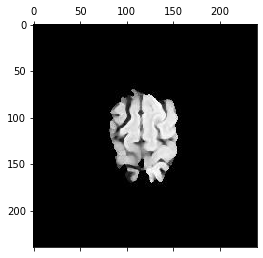

In [6]:
plt.matshow(images[500],cmap="gray")

We will now be using the hog method :
The Histogram of Oriented Gradients (HOG) is a feature descriptor used in computer vision and image processing for the purpose of object detection. The technique counts occurrences of gradient orientation in localized portions of an image.
A demonstration will be given later on.

In [7]:
def hog_list (listimage) :
    fv = []
    hog_image = []
    for i in range(len(listimage)) :
        a, b = hog(listimage[i], orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=False)
        fv.append(a)
        hog_image.append(b)
    return fv,hog_image

fv_images, hog_images = hog_list(images[0:1000])

C:\Users\amine\AppData\Local\Temp\ipykernel_22408\2592297562.py:5: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  a, b = hog(listimage[i], orientations=9, pixels_per_cell=(8, 8),


1000

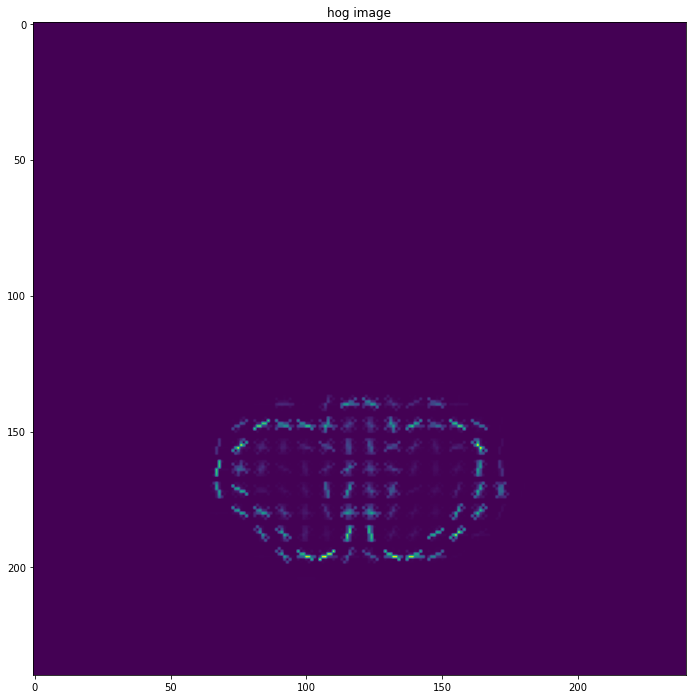

In [8]:
plt.figure(figsize=(14,12))
plt.imshow(hog_images[0]),plt.title("hog image")
len(fv_images)

In [9]:
#Our target and data variables
fv_images = pd.DataFrame(fv_images)
etiq_images=y[0:1000]

In [10]:
# To test the performance of the models used
from sklearn import metrics
# Classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,ShuffleSplit

In [11]:
fv_train, fv_test, etiq_train, etiq_test = train_test_split(fv_images, etiq_images, test_size=0.2,random_state=42) 
print("Le nombre d'échantillon d'entrainement = ",fv_train.shape)
print("Le nombre d'échantillon de test = ",fv_test.shape)

Le nombre d'échantillon d'entrainement =  (800, 30276)
Le nombre d'échantillon de test =  (200, 30276)


In [12]:
mlp = MLPClassifier(solver='adam', alpha=1e-6, activation='logistic', max_iter = 2500, hidden_layer_sizes=(10,5,3,6), random_state=100).fit(fv_train,etiq_train)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores=cross_val_score(mlp,fv_train,etiq_train,cv=cv)
print(scores.mean())

0.7141666666666666


In [13]:
metrics.accuracy_score(etiq_train, mlp.predict(fv_train))

0.72375

We got a score of 71% , which isn't great , and our training set itself is under fitted, but unfortunatly due to computaional lack of power this is the best result we could get with the means at hand

Let's try and predict the test set

In [14]:
ymlp = mlp.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, ymlp))

Accuracy :  0.72


Same thing for the test set

#### Note 

Due to the lack of powerful material and time, many things weren't done properly , for instance we had to resort to the classical trial and error method to tune our parameters and not every combination could be tried.
But if that was not the case what could be done to improve our model? Here are a few things we can mention :
- A grid search to tune the parameters.
- Taking the full set instead of just a portion of it.
- Resorting to more powerful methods

### Conclusion

Objectively speaking we would say that our ML model had better performances on our set, with a precision of 98% it surpasses greatly the underperformant DL model with 72%.

But we know that this isn't necessarly true , we have indeed shown the power of our rfc model, but the mlp model didn't get the chance to "play fair" if we may say. The parameters weren't perfectly tuned and the data size was reduced (it should also be mentioned that the data used isn't the same, the first one is a dataframe and the second are pictures) , therefore it is left undetermined wether the model could've done better.

Although, from this porject we can see the potential that mlp holds, and hopefully with further experience we will be able to create stronger models and redo the comparaison properly

We have also confirmed once more the power that machine learning holds in classifying with our rfc model.

So to conclude, we just wanna thank the whole CLA team who helped us get to this point, it has been an amazing journey, and one that we will always cherish. So once again , Thank YOU.